# CNN
+ `input` -> conv layer -> pool layer -> ...(feature extractor)
            -> flat layer
            -> dense layer -> dropout layer -> ... (classifier)
            -> `output`

## FEATURE MAP 만들기

### Convolution
+ 특징(feature) 추출 : 예측에 중요한 영향 요소
+ Convolution 으로 feature를 만듦
+ Convolution: 각 픽셀을 본래 픽셀과 그 주변 픽셀의 주합으로 대체하는 동작
    + 필터 또는 커널 : 연산에 쓰이는 작은 행렬
    + 필터의 값 : 가중치
        + 학습을 통해 최적의 가중치 w 찾기
        + 수직선 검출, 수평선 검출, Box blur, sharpen 등
        + 딥러닝기반 : 네트워크가 특징을 추출하는 필터를 자동으로 생성 (반복문으로 최적의가중치를 찾음)
    + (ex) 5 * 5 행렬을 3 * 3 필터에 넣어서 3 * 3행렬로 변환
        + 이때 일반적인 행렬의 곱이 아님...!

### Layer
+ Flatten Layer : 다차원의 이미지를 1차원 뉴런으로 바꿈
    + 이미지 : (256,256) => (flatten) => (256* 256, )
    + 영상 : (256, 256, frame) => (flatten) => (256* 256*frame, )

+ Dense Layer : (1차원)뉴런 완전 연결
    + 완전연결 시 과적합 발생할 수 있어 무작위 뉴런선택, 비활성화 (drop out)

+ convolution layer
    + 필터는 자동으로 추출 됨
    + hyperParameter : 필터의 개수, 필터의 사이즈 정하기

+ pooling layer
    + subsampling : 비슷한 정보는 버리고 중요한 정보만 남김, 과적합 방지에 효과적
        + max, Average, ...

+ dropout layer
    + 과적합 방지를 위하여 학습 시 무작위로 뉴런의 부분집합 제거
    + 학습시에는 확률적으로 일부 뉴런에 대해 연결을 끊고,
    + 테스트 시에는 정상적으로 모든값 포함해서 계산

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import array, zeros_like

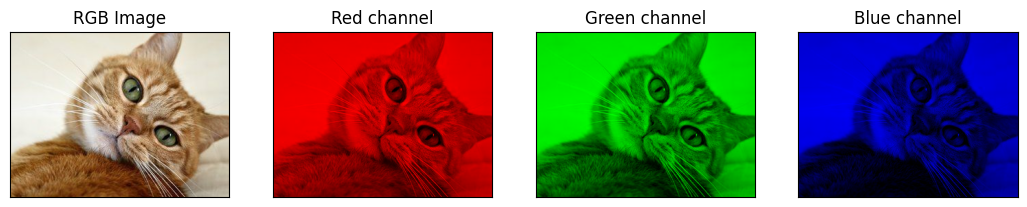

In [ ]:
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

def channel(image, color): #해당 색깔을 추출
    if color not in (0, 1, 2): return image
    c = image[..., color]
    # print(len(c)) #241
    # print(len(c[0])) #320
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)

colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [ ]:
# 6.1 Conv2D 레이어 생성 코드 - 필터는 가중치값의 행렬
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid' ,filters=16)
# 필터가 합성곱층의 가중치 파라미터 W에 해당 > 학습단계에서 적절한 필터를 찾도록 학습
# kernel_size : 필터 행렬의 크기
# strides : 필터가 계산과정에서 한 스텝마다 이동하는 크기. default (1,1), 이미지 크기에 영향
# padding : 이미지 주변에 빈 값을 넣을지 (default valid(padding 없음, / same => 입력과 출력 이미지 크기가 같아짐)
# filters : 필터의 개수

In [ ]:
# 6.2 MaxPool2D 레이어 생성 코드 - 가중치가 없음  > 학습되지 않음
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
# pool_size : sampling 행렬의 크기
# strides : 계산과정에서 한 스텝마다 이동하는 크기

In [ ]:
# 6.3 Dropout 레이어 생성 코드 - 가중치 없다 > 학습 없다
pool1 = tf.keras.layers.Dropout(rate=0.3)
# rate : 제외할 데이터의 비율

### 실습하기
+ Fashion MNIST 데이터셋
+ [CNN, Convolutional Neural Network 요약](http://taewan.kim/post/cnn/)

In [2]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0 # 정규화 0~255 => 0~1 데이터로 바꿈
test_X = test_X / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

# reshape할때 -1 넣으면 이미지 개수 상관하지않겠다는...
train_X = train_X.reshape(-1, 28, 28, 1) # 흑백 채널 추가 - (60000, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


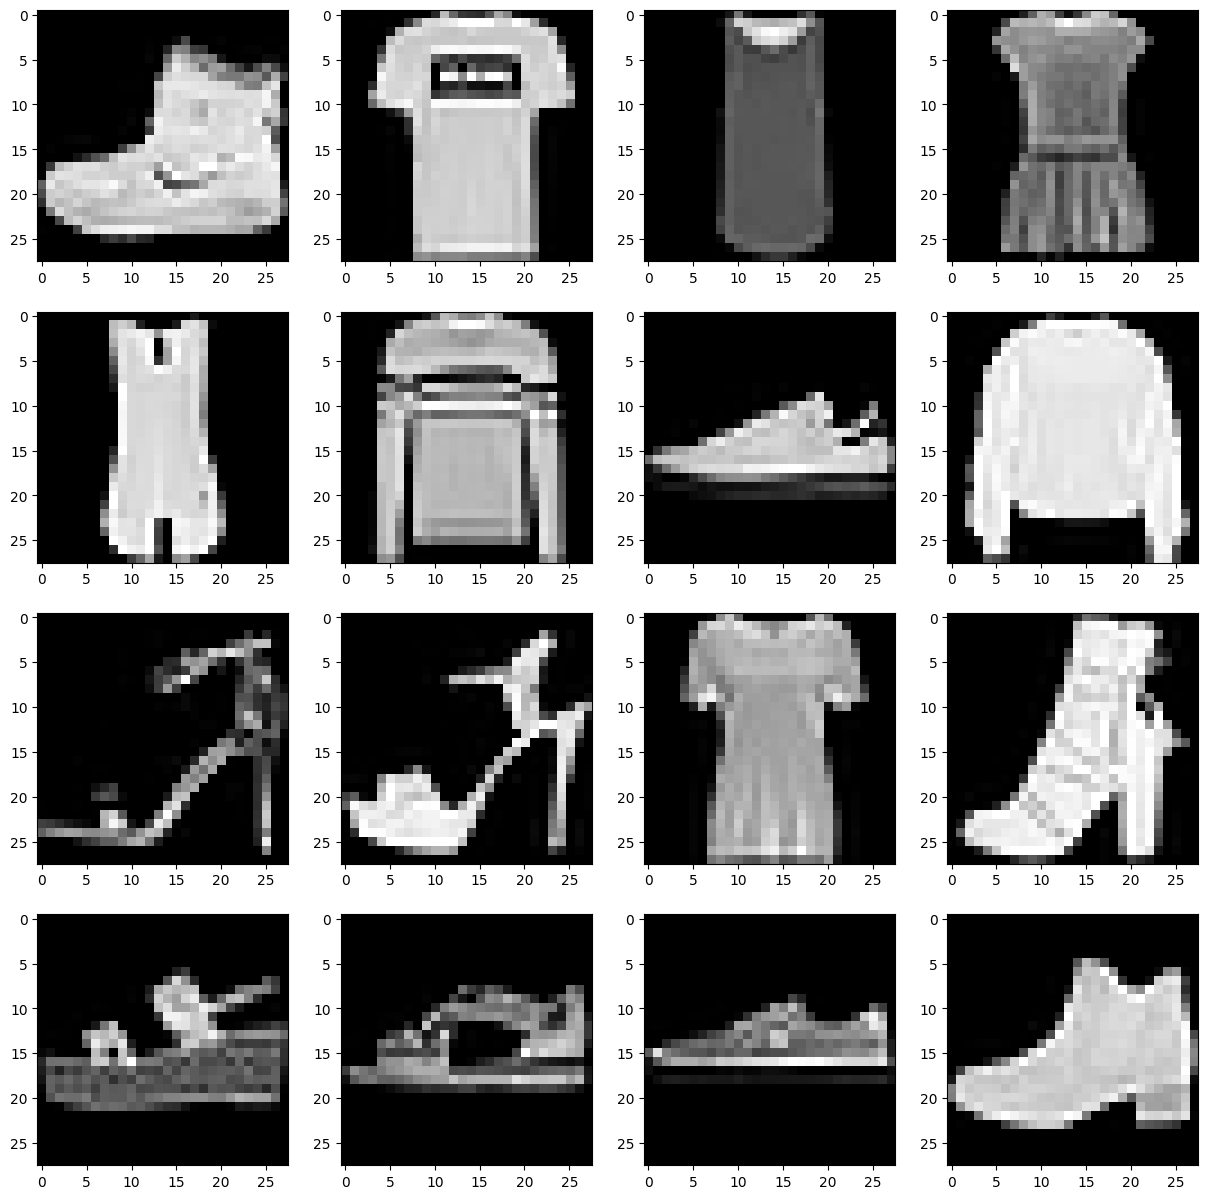

In [4]:
# 6.6 데이터 확인
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(15, 15))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1) # grid(4,4)에서 위 > 아래, 왼쪽 > 오른쪽 순서로
    plt.imshow(train_X[c].reshape(28,28), cmap='gray') # reshape(28,28)로 3차원 데이터를 다시 2차원 데이터로 변환후 출력

plt.show()

In [5]:
# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
# 분류값 (신발, 티셔츠 ...)
print(train_Y[:16])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [6]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
# 풀링 레이어, 드랍아웃 레이어 없이 정의 => 속도가 매우 느림
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),# input_shape(28,28,1)은 이미지 높이, 너비, 채널 수
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),# 다차원 데이터를 1차원으로 정렬
    tf.keras.layers.Dense(units=128, activation='relu'), # 분류기
    tf.keras.layers.Dense(units=10, activation='softmax') # 분류기
])

In [7]:
# configure
# 경사하강법, 손실함수
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

Epoch 1/25
1407/1407 [==============================] - 21s 7ms/step - loss: 0.4709 - accuracy: 0.8302 - val_loss: 0.3649 - val_accuracy: 0.8659
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3416 - accuracy: 0.8757 - val_loss: 0.3573 - val_accuracy: 0.8725
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2861 - accuracy: 0.8934 - val_loss: 0.3683 - val_accuracy: 0.8722
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2432 - accuracy: 0.9090 - val_loss: 0.3810 - val_accuracy: 0.8707
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2099 - accuracy: 0.9221 - val_loss: 0.4325 - val_accuracy: 0.8687
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1825 - accuracy: 0.9324 - val_loss: 0.4554 - val_accuracy: 0.8663
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1604 - accuracy: 0.9404 - val_loss: 0.5172 - val_accuracy

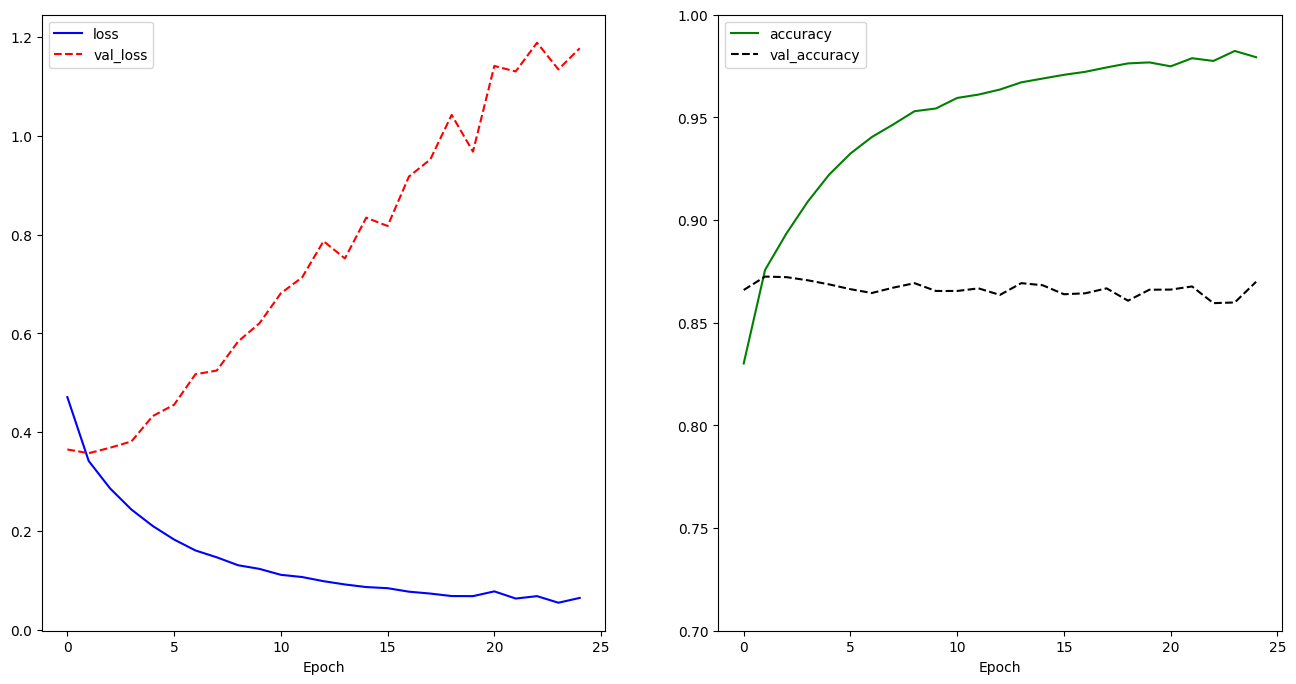

[1.3099164962768555, 0.8586999773979187]

In [8]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

# 손실 그래프 - val_loss는 증가하는 과적합 형태 보임
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
# 검증 정확도 val_accuracy는 학습이 진행될수록 감소
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
# 첫째 결과가 테스트 데이터의 loss, 두번째 결과가 테스트 데이터의 accuracy
model.evaluate(test_X, test_Y, verbose=0)

In [9]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)), # stride를 증가시킴
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),# flatten 레이어 파라미터수가 30976 > 1152로 감소
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),# 과적합 개선에 기여
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()# 총 파라미터 숫자가 24만개로 감소

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

Epoch 1/25
1407/1407 [==============================] - 10s 6ms/step - loss: 0.5246 - accuracy: 0.8104 - val_loss: 0.3624 - val_accuracy: 0.8673
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3561 - accuracy: 0.8729 - val_loss: 0.3366 - val_accuracy: 0.8766
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3160 - accuracy: 0.8866 - val_loss: 0.2973 - val_accuracy: 0.8921
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2857 - accuracy: 0.8972 - val_loss: 0.2999 - val_accuracy: 0.8939
Epoch 5/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2692 - accuracy: 0.9025 - val_loss: 0.2902 - val_accuracy: 0.8951
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2513 - accuracy: 0.9074 - val_loss: 0.3103 - val_accuracy: 0.8933
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2358 - accuracy: 0.9137 - val_loss: 0.3003 - val_accuracy

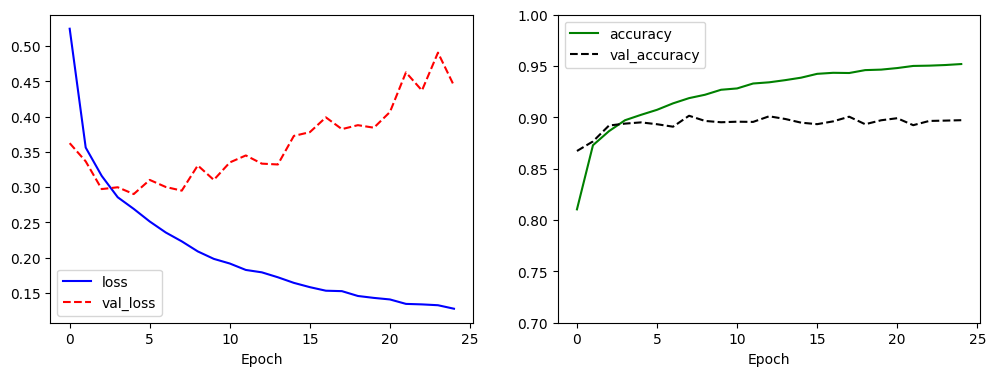

[0.48539605736732483, 0.8909000158309937]

In [10]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss는 여전히 증가
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') # 일정 수준에 머물다
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)# 정확도 89%

##### 퍼포먼스 높이기
+ 더 많은 레이어 쌓기
+ 이미지 보강

In [11]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
# 더 많은 레이어 쌓기
# VGG-19 모델이 가장 깊은 레이어 구조 > 특징 추출기 초반에 컨볼루션 레이어 2개 + 풀링 1개를 반복 2차례
# VGG-7: 7은 컨볼루션 갯수와 Dense 갯수 의 합
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # 총 파라미터는 520만개

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 256)       295168    
                                                      

Epoch 1/25
1407/1407 [==============================] - 17s 10ms/step - loss: 0.5825 - accuracy: 0.7888 - val_loss: 0.3386 - val_accuracy: 0.8732
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3666 - accuracy: 0.8690 - val_loss: 0.2837 - val_accuracy: 0.8983
Epoch 3/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3251 - accuracy: 0.8825 - val_loss: 0.2554 - val_accuracy: 0.9068
Epoch 4/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3012 - accuracy: 0.8935 - val_loss: 0.2386 - val_accuracy: 0.9110
Epoch 5/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2842 - accuracy: 0.8995 - val_loss: 0.2397 - val_accuracy: 0.9120
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2756 - accuracy: 0.9012 - val_loss: 0.2237 - val_accuracy: 0.9195
Epoch 7/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2691 - accuracy: 0.9049 - val_loss: 0.2262 - val_

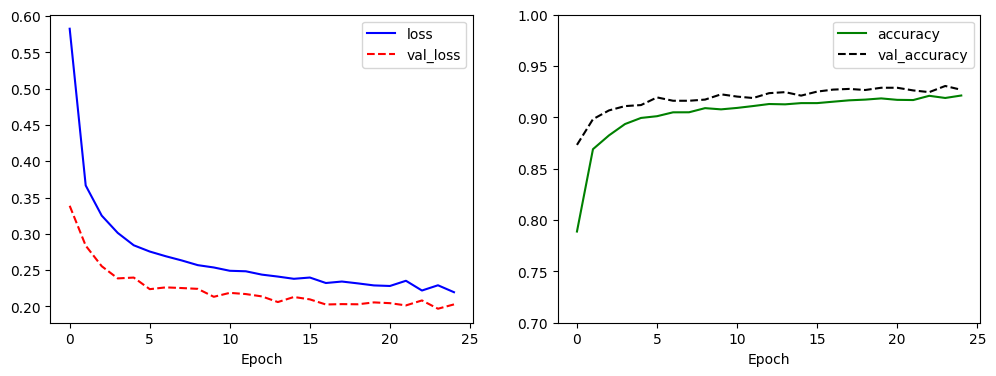

[0.21680685877799988, 0.9214000105857849]

In [12]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss가 증가하지 않는다
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
#정확도가 92.52%로 좋다
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

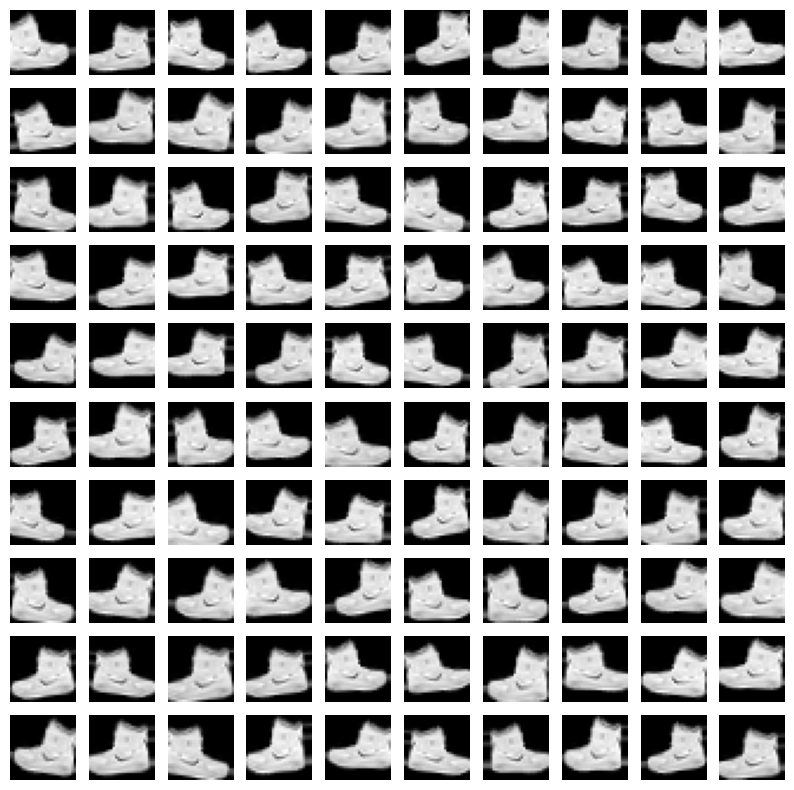

In [13]:
# 6.14 Image Augmentation 데이터 표시
# 이미지 보강 : 훈련 데이터에 없는 이미지를 새롭게 만들어 훈련데이터를 보강하는 방법 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator( # 훈련데이터의 표현력을 더 좋게 만드는 방법
            rotation_range=10,# 회전
            zoom_range=0.10,
            shear_range=0.5,#기울이거나
            width_shift_range=0.10,# 평행이동
            height_shift_range=0.10,
            horizontal_flip=True,#이미지를 가로로 뒤집다
            vertical_flip=False) # 이미지를 세로로 뒤집다

augment_size = 100
# flow()는 실제로 보강된 이미지를 생성
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),
                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [14]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000 #훈련 데이터의 50%인 30,000개의 이미지 추가를 위해 설정

randidx = np.random.randint(train_X.shape[0], size=augment_size) # 60,000 정수 중에서 30,000 정수를 랜덤하게 추출
# np.random.choice()로 대체 가능
# randidx는 임의 정수들의 넘파이 배열
x_augmented = train_X[randidx].copy() # 복사한다 
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), 
                      batch_size=augment_size, shuffle=False).next()[0]
print(train_X.shape)
# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented)) # 이미지 보강
train_Y = np.concatenate((train_Y, y_augmented))
#train_X가 여러번 반복하면 누적 증가되어 이해가 필요 
print(train_X.shape)

(60000, 28, 28, 1)
(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 22s 9ms/step - loss: 0.5681 - accuracy: 0.7937 - val_loss: 0.5770 - val_accuracy: 0.7820
Epoch 2/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.3781 - accuracy: 0.8634 - val_loss: 0.5322 - val_accuracy: 0.8154
Epoch 3/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.3411 - accuracy: 0.8767 - val_loss: 0.4877 - val_accuracy: 0.8134
Epoch 4/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.3220 - accuracy: 0.8832 - val_loss: 0.4815 - val_accuracy: 0.8207
Epoch 5/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.3066 - accuracy: 0.8896 - val_loss: 0.4414 - val_accuracy: 0.8344
Epoch 6/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.2970 - accuracy: 0.8928 - val_loss: 0.4180 - val_accuracy: 0.8474
Epoch 7/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.2910 - accuracy: 0.8947 - val_loss: 0.4010 - val_ac

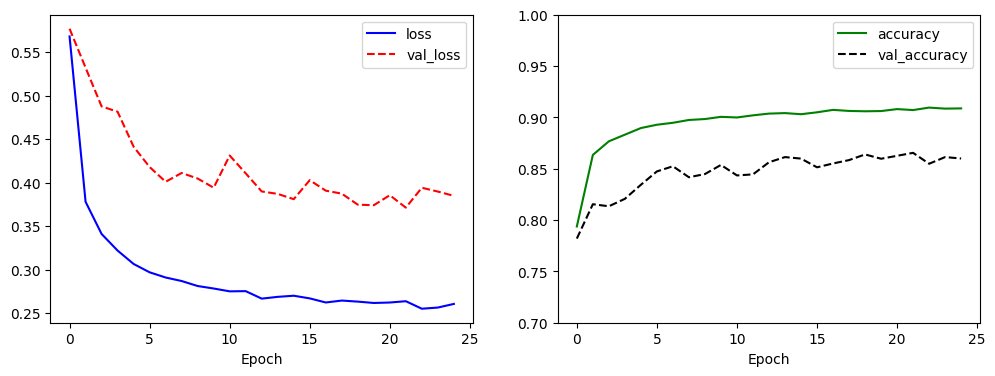

[0.22214065492153168, 0.9200999736785889]

In [15]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same',
                           activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#분류 정확도가 92.88으로 92.52보다 약간 증가
model.evaluate(test_X, test_Y, verbose=0)